# Setup

In [1]:
import datetime
import numpy as np
import pandas as pd
import pickle
import sys

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [2]:
%reload_ext autoreload
%autoreload 2

src_path = "/Users/aarontrefler_temp2/Documents/My Documents/Kaggle/ncaa-men-19/src"
sys.path.insert(0, src_path)

import models

from utils import cols_to_front, display_df

pd.options.display.max_columns = 999

In [3]:
data_clean_dir = '../data/clean/'

# Read Data

In [4]:
df_clean = pd.read_csv(data_clean_dir + 'model_dataset.csv')
df_clean_sub = pd.read_csv(data_clean_dir + 'submission_dataset.csv')

In [5]:
display_df(df_clean, n=5, tail=True, title="Tournament Games")
display_df(df_clean_sub, n=5, tail=True, title="Submission File Games")

Tournament Games:


,Season,TeamOne_Name,TeamTwo_Name,Label,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
0,1985.0,Alabama,Arizona,1.0,1104.0,1112.0,7.0,10.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,-3.0,0.0,0.490111,0.153702,0.050672,0.344328
1,1985.0,Alabama,VA Commonwealth,1.0,1104.0,1433.0,7.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,5.0,0.0,0.490111,0.153702,0.050672,0.344328
2,1985.0,Alabama,NC State,0.0,1104.0,1301.0,7.0,3.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,

,Season,TeamOne_Name,TeamTwo_Name,Label,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
2137,2018.0,Tennessee,Wright St,1.0,1397.0,1460.0,3.0,14.0,15.818182,10.818182,4.484848,3.303030,24.484848,23.090909,57.484848,20.454545,19.939394,54.939394,25.242424,7.848485,6.363636,22.515152,21.000000,21.060606,15.878788,15.000000,0.060606,11.666667,11.242424,19.575758,19.515152,74.212121,66.393939,6.303030,5.636364,12.212121,13.939394,68.005303,67.640152,109.414278,98.163525,11.250753,67.822727,13.218750,11.843750,2.281250,2.906250,26.093750,25.093750,57.531250,20.125000,22.281250,56.093750,24.781250,6.843750,7.781250,23.187500,20.718750,16.812500,14.906250,12.000000,0.062500,10.125000,8.687500,16.031250,20.031250,71.312500,66.156250,6.593750,5.906250,13.062500,14.843750,70.310156,70.235938,101.332394,94.131659,7.200736,70.273047,2.599432,-1.025568,2.203598,0.396780,-1.608902,-2.002841,-0.046402,-1.154356,0.329545,-2.341856,0.461174,-0.672348,1.004735,-1.417614,0.281250,4.248106,0.972538,3.000000,1.541667,2.554924,3.544508,-0.516098,2.899621,0.237689,-0.290720,-0.269886,-0.850379,-0.904356,-2.304853,-2.595786,-11.0,-0.001894,8.081884,4.031867,4.050017,-2.450320
2138,2018.0,Texas Tech,Villanova,0.0,1403.0,1437.0,3.0,1.0,14.424242,10.363636,4.272727,3.636364,24.939394,21.939394,56.363636,19.212121,20.969697,54.030303,26.151515,7.030303,6.878788,21.757576,22.696970,20.545455,15.909091,14.303030,0.060606,11.000000,9.818182,18.151515,20.878788,75.242424,64.696970,7.393939,5.939394,12.545455,15.181818,68.690152,69.153030,109.643838,93.850766,15.793072,68.921591,16.676471,14.000000,3.970588,2.676471,26.205882,23.147059,61.529412,28.676471,21.352941,60.205882,31.029412,11.411765,7.000000,26.147059,17.617647,15.382353,13.588235,11.588235,0.088235,9.382353,9.558824,15.852941,17.235294,87.058824,70.882353,6.676471,4.558824,10.352941,13.117647,70.868382,71.071324,122.981400,99.758537,23.222863,70.969853,-2.252228,-3.636364,0.302139,0.959893,-1.266488,-1.207665,-5.165775,-6.175579,-9.464349,-0.383244,-4.877897,-4.389483,-4.381462,-0.121212,5.079323,5.163102,2.320856,2.714795,1.617647,0.259358,2.298574,3.643494,-11.816399,-6.185383,0.717469,1.380570,2.192513,2.064171,-2.178231,-1.918293,2.0,-0.027629,-13.337562,-5.907771,-7.429791,-2.048262
2139,2018.0,TX Southern,Xavier,0.0,1411.0,1462.0,16.0,1.0,12.264706,15.882353,3.941176,3.911765,25.882353,25.794118,58.500000,21.529412,21.352941,64.323529,25.823529,7.823529,7.911765,29.176471,25.294118,20.176471,18.176471,13.470588,0.058824,10.294118,12.264706,17.735294,21.088235,77.647059,79.735294,5.588235,5.294118,12.617647

(2142, 114)

Submission File Games:


,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
0,2014.0,Albany NY,American Univ,1107.0,1110.0,16.0,15.0,11.0625,12.34375,3.0625,3.03125,24.21875,21.59375,51.09375,13.46875,19.59375,54.34375,22.4375,4.90625,6.90625,22.75,21.71875,15.84375,16.25,11.4375,0.09375,10.34375,9.9375,17.25,19.25,66.03125,63.84375,5.53125,5.84375,12.625,11.96875,63.691406,63.900781,103.790983,100.032247,3.758736,63.796094,15.125000,10.093750,3.437500,2.437500,22.937500,19.312500,46.562500,16.593750,15.062500,49.031250,23.031250,6.343750,4.718750,20.156250,16.250000,20.187500,11.531250,13.593750,0.031250,7.125000,9.781250,17.218750,17.625000,63.937500,58.625000,6.031250,7.031250,13.968750,12.125000,61.125000,60.964062,104.874508,96.637013,8.237495,61.044531,-4.062500,2.250000,-0.375000,0.593750,1.281250,2.281250,4.531250,5.312500,-3.125000,4.531250,-0.593750,2.593750,-1.437500,2.187500,5.468750,-4.343750,4.718750,-2.156250,3.218750,0.156250,0.031250,1.625000,2.093750,5.218750,-0.500000,-1.187500,-1.343750,-0.156250,2.566406,2.936719,1.0,0.062500,-1.083525,3.395235,-4.478760,2.751562
1,2014.0,Albany NY,Arizona,1107.0,1112.0,16.0,1.0,11.0625,12.34375,3.0625,3.03125,24.21875,21.59375,51.09375,13.46875,19.59375,54.34375,22.4375,4.90625,6.90625,22.75,21.71875,15.84375,16.25,11.4375,0.09375,10.34375,9.9375,17.25,19.25,66.03125,63.84375,5.53125,5.84375,12.625,11.96875,63.691406,63.900781,103.790983,100.032247,3.758736,63.796094,15.088235,9.176471,4.235294,3.176471,26.294118,21.205882,56.000000,14.852941,14.029412,53.500000,26.235294,5.294118,4.411765,20.382353,23.352941,18.441176,15.294118,12.970588,0.088235,12.588235,9.235294,16.441176,18.617647,73.058824,58.147059,5.882353,4.764706,10.441176,12.411765,64.945588,65.436029,112.719530,88.498808,24.220722,65.190809,-4.025735,3.167279,-1.172794,-0.145221,-2.075368,0.387868,-4.906250,0.843750,-1.384191,5.564338,-3.797794,2.367647,-0.387868,2.494485,-1.634191,-2.597426,0.955882,-1.533088,-2.244485,0.702206,0.808824,0.632353,-7.027574,5.696691,-0.351103,1.079044,2.183824,-0.443015,-1.254182,-1.535248,15.0,0.005515,-8.928547,11.533439,-20.461986,-1.394715
2,2014.0,Albany NY,Arizona St,1107.0,1113.0,16.0,10.0,11.0625,12.34375,3.0625,3.03125,24.21875,21.59375,51.09375,13.46875,19.59375,54.34375,22.4375,4.90625,6.90625,22.75,21.71875,15.84375,16.25,11.4375,0.09375,10.34375,9.9375,17.25,19.25,66.03125,63.84375,5.53125,5.84375,12.625,11.96875,63.691406,63.900781,103.790983,100.032247,3.758736,63.796094,14.187500,11.562500,5.656250,4.062500,27.187500,26.437500,56.125000,21.031250,16.375000,59.468750,25.28

,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
11385,2018.0,West Virginia,Xavier,1452.0,1462.0,5.0,1.0,15.058824,12.235294,5.264706,3.941176,23.882353,24.235294,64.00000,24.911765,20.147059,52.970588,27.764706,8.794118,7.529412,22.50000,19.970588,23.382353,15.294118,16.470588,0.029412,14.00000,10.235294,21.382353,18.764706,79.617647,69.00000,8.029412,5.470588,11.323529,16.50000,70.809559,70.341912,112.591216,98.798682,13.792534,70.575735,16.636364,14.333333,2.939394,3.636364,28.606061,22.727273,58.848485,21.181818,25.878788,62.787879,28.878788,7.818182,8.636364,27.090909,23.666667,15.545455,18.69697,11.666667,0.090909,9.787879,8.484848,16.939394,20.939394,84.272727,74.484848,5.848485,6.606061,12.424242,11.424242,72.726515,73.111364,115.848327,101.982032,13.866295,72.918939,-1.577540,-2.098039,2.325312,0.304813,-4.723708,1.508021,5.151515,-9.817291,3.729947,-5.731729,-1.114082,-4.590909,0.975936,-1.106952,-3.696078,7.836898,-3.402852,4.803922,4.212121,1.750446,4.442959,-2.174688,-4.655080,-5.484848,2.180927,-1.135472,-1.100713,5.075758,-1.916956,-2.769452,4.0,-0.061497,-3.257111,-3.183350,-0.073761,-2.343204
11386,2018.0,West Virginia,Wright St,1452.0,1460.0,5.0,14.0,15.058824,12.235294,5.264706,3.941176,23.882353,24.235294,64.00000,24.911765,20.147059,52.970588,27.764706,8.794118,7.529412,22.50000,19.970588,23.382353,15.294118,16.470588,0.029412,14.00000,10.235294,21.382353,18.764706,79.617647,69.00000,8.029412,5.470588,11.323529,16.50000,70.809559,70.341912,112.591216,98.798682,13.792534,70.575735,13.218750,11.843750,2.281250,2.906250,26.093750,25.093750,57.531250,20.125000,22.281250,56.093750,24.781250,6.843750,7.781250,23.187500,20.718750,16.812500,14.90625,12.000000,0.062500,10.125000,8.687500,16.031250,20.031250,71.312500,66.156250,6.593750,5.906250,13.062500,14.843750,70.310156,70.235938,101.332394,94.131659,7.200736,70.273047,1.840074,0.391544,2.983456,1.034926,-2.211397,-0.858456,6.468750,-3.123162,4.786765,-2.134191,2.983456,-0.687500,1.950368,-0.251838,-0.748162,6.569853,0.387868,4.470588,3.875000,1.547794,5.351103,-1.266544,8.305147,2.843750,1.435662,-0.435662,-1.738971,1.656250,0.499403,0.105974,-9.0,-0.033088,11.258821,4.667024,6.591798,0.302688
11387,2018.0,Wichita St,Xavier,1455.0,1462.0,4.0,1.0,18.531250,10.781250,3.937500,3.343750,28.343750,22.406250,60.75000,23.687500,23.531250,58.187500,29.062500,9.125000,8.531250,24.40625,21.343750,19.281250,15.750000,14.000000,0.062500,12.15625,8.312500,17.593750,20.125000,83.000000,71.34375,4.687500,5.906250,11.562500,11.56250,70.294531,70.596094,118.11

(11390, 113)

# Train / Validation Split

In [6]:
df_train = df_clean.loc[df_clean.Season.isin(np.arange(1985, 2014))]
df_valid = df_clean.loc[df_clean.Season.isin(np.arange(2014, 2019))]

# Train Model

In [7]:
features = list(set(df_clean.columns) - set(['Label', 'Season', 'TeamOneID', 'TeamTwoID', 
                                               'TeamOne_Name', 'TeamTwo_Name']))

In [8]:
# Create custom cross validator object based off train-validation split
test_fold = np.concatenate((np.zeros(len(df_train)) - 1, np.zeros(len(df_valid))))
ps_cv = PredefinedSplit(test_fold)

# Hyper-parameter optimization
parameters = {
    'min_samples_split': [25, 50, 75],
    'n_estimators': [100, 500],
    'random_state': [3]
}
clf = RandomForestClassifier()
gridcv = GridSearchCV(clf, parameters, cv=ps_cv, scoring='neg_log_loss', 
                      error_score='raise', n_jobs=2, return_train_score=True)

X = df_clean[features].values
y = df_clean.Label.values
gridcv.fit(X, y)

# Create classifier with optimal hyper-parameters
clf = RandomForestClassifier(**gridcv.best_params_)
print(gridcv.best_params_)

{'n_estimators': 500, 'min_samples_split': 75, 'random_state': 3}


In [9]:
# Display CV results
(
    pd.DataFrame(gridcv.cv_results_)
    .sort_values('rank_test_score')
    .loc[:, ['mean_train_score', 'mean_test_score']]
    .head(1)
)

,mean_train_score,mean_test_score
5,-0.472324,-0.580947


# Make Predictions

In [10]:
y_train = df_train.Label.values
X_train = df_train[features].values

# Train score
clf.fit(X_train, y_train)
yp_train = models.clip_preds(clf.predict_proba(X_train)[:, 1])
score_train = log_loss(y_train, yp_train, normalize=True)
acc_train = sum(np.round(yp_train) == y_train) / len(y_train)

print("Logloss:", score_train)
print("Accuracy:", acc_train)

Logloss: 0.47355202035
Accuracy: 0.795840175151


In [11]:
y_valid = df_valid.Label.values
X_valid = df_valid[features].values

# Validation score
yp_valid = models.clip_preds(clf.predict_proba(X_valid)[:, 1])
score_valid = log_loss(y_valid, yp_valid, normalize=True)
acc_valid = sum(np.round(yp_valid) == y_valid) / len(y_valid)

print("Logloss:", score_valid)
print("Accuracy:", acc_valid)

Logloss: 0.580947099649
Accuracy: 0.720634920635


# Analyze Model

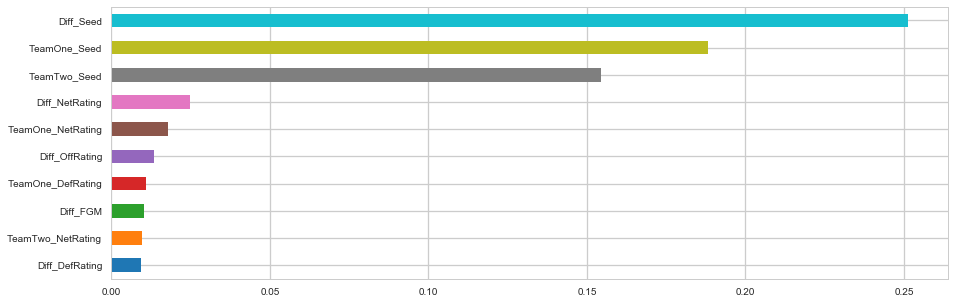

In [12]:
(
    pd.Series(clf.feature_importances_, index=df_train[features].columns)
    .nlargest(n=10)
    .sort_values()
    .plot(kind='barh', figsize=(15, 5), fontsize=10)

)
plt.show()

# Analyze Predictions

In [13]:
df_train_pred = (
    df_train
    .assign(Pred=yp_train)
    .pipe(models.compute_logloss)
    .sort_values('Logloss', ascending=False)
    .pipe(cols_to_front, front_cols=['Logloss', 'Label', 'Pred'])
)

df_valid_pred = (
    df_valid
    .assign(Pred=yp_valid)
    .pipe(models.compute_logloss)
    .sort_values('Logloss', ascending=False)
    .pipe(cols_to_front, front_cols=['Logloss', 'Label', 'Pred'])      
)

In [14]:
display_df(df_train_pred, n=5, tail=True, title='Training Prediction Errors')
display_df(df_valid_pred, n=10, tail=True, title='Validation Prediction Errors')

Training Prediction Errors:


,Logloss,Label,Pred,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
504,2.995732,0.0,0.950000,1993.0,Arizona,Santa Clara,1112.0,1365.0,2.0,15.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,-13.0,0.0,0.490111,0.153702,0.050672,0.344328
434,2.494568,1.0,0.082532,1991.0,Richmond,Syracuse,1350.0,1393.0,15.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,13.0,0.0,0.490111,0.153702,0.050672,0.344328
1045,2.494568,1.0,0.082532,2001.0,Hampton,Iowa St,1214.0,1235.0,15.0,2.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.

,Logloss,Label,Pred,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
989,0.051293,1.0,0.95,2000.0,Michigan St,Valparaiso,1277.0,1434.0,1.0,16.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,-15.0,0.0,0.490111,0.153702,0.050672,0.344328
273,0.051293,0.0,0.05,1989.0,ETSU,Oklahoma,1190.0,1328.0,16.0,1.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951788,14.537054,11.934409,3.823529,3.137931,24.790998,22.140394,56.867965,18.758098,18.587198,55.8125,25.969697,6.8,6.107143,22.891176,21.368519,18.5,15.149287,12.666667,0.057143,11.735294,10.909091,17.550056,19.16129,73.809091,65.129032,6.882353,6.014706,12.545455,13.88057,67.701591,67.659652,109.385849,95.974371,13.78543,67.667773,0.148522,0.006061,0.102083,0.017793,0.142525,-0.092708,0.210446,0.621473,-0.124777,-0.065236,0.364468,0.298574,0.061581,0.001927,0.319073,0.036706,0.266544,-0.010959,-0.018939,0.266043,0.109927,0.053883,0.959197,0.494656,0.097232,0.134241,0.192761,0.03457,0.406157,0.417045,15.0,0.0,0.490111,0.153702,0.050672,0.344328
162,0.051293,1.0,0.95,1987.0,Iowa,Santa Clara,1234.0,1365.0,2.0,15.0,14.774194,11.939394,4.0,3.135632,24.8,21.863971,56.716578,18.741935,18.727273,56.298574,26.412121,6.864368,6.151515,23.096774,21.571429,18.439338,15.298574,12.612903,0.058824,11.65625,11.112395,17.636364,19.063508,74.911765,65.272727,6.9375,5.970588,12.777722,13.875,67.914504,67.954839,110.166058,96.550243,13.424874,67.951

(1827, 116)

Validation Prediction Errors:


,Logloss,Label,Pred,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
1992,1.693798,0.0,0.816180,2016.0,Michigan St,MTSU,1277.0,1292.0,2.0,15.0,20.558824,10.617647,5.147059,3.235294,29.558824,20.735294,59.529412,21.029412,18.794118,57.823529,28.794118,9.117647,5.676471,21.794118,17.882353,19.676471,13.058824,14.117647,0.058824,12.294118,9.352941,19.088235,17.558824,79.764706,63.382353,4.411765,5.323529,11.794118,9.558824,67.523529,67.375735,118.026062,93.920597,24.105465,67.449632,13.032258,11.451613,3.483871,2.774194,26.548387,26.064516,57.709677,20.580645,18.354839,54.322581,25.903226,8.000000,6.258065,23.225806,20.612903,23.225806,12.516129,15.516129,0.032258,10.258065,9.064516,20.451613,18.838710,72.322581,68.225806,6.258065,5.838710,11.935484,13.516129,69.178226,69.806452,104.563218,98.062200,6.501018,69.492339,7.526565,-0.833966,1.663188,0.461101,3.010436,-5.329222,1.819734,3.500949,0.448767,0.439279,2.890892,-1.431689,1.117647,-0.581594,-2.730550,-3.549336,0.542694,-1.398482,2.036053,0.288425,-1.363378,-1.279886,7.442125,-4.843454,-1.846300,-0.515180,-0.141366,-3.957306,-1.654696,-2.430716,-13.0,0.026565,13.462843,-4.141604,17.604447,-2.042706
2016,1.548540,0.0,0.787442,2017.0,Arizona,Xavier,1112.0,1462.0,2.0,11.0,13.794118,12.647059,3.235294,3.000000,26.470588,20.558824,55.088235,16.941176,20.941176,57.205882,26.205882,6.735294,6.411765,23.764706,22.588235,16.676471,17.117647,11.500000,0.000000,10.294118,9.382353,16.970588,19.794118,76.264706,65.441176,5.500000,4.735294,11.441176,11.911765,66.964706,67.656618,113.630822,96.892078,16.738744,67.310662,14.852941,14.058824,2.676471,3.823529,25.382353,22.500000,56.735294,20.676471,22.000000,56.088235,25.764706,7.029412,7.441176,25.352941,23.352941,18.882353,16.058824,13.205882,0.029412,12.205882,8.470588,18.764706,21.382353,74.617647,71.352941,6.147059,6.411765,12.794118,12.235294,68.416176,68.822059,109.108468,103.655255,5.453214,68.619118,-1.058824,-1.411765,0.558824,-0.823529,1.088235,-1.941176,-1.647059,1.117647,-3.735294,-1.058824,0.441176,-1.588235,-0.294118,-1.029412,-0.764706,-2.205882,1.058824,-1.705882,-1.911765,0.911765,-1.794118,-1.588235,1.647059,-5.911765,-0.647059,-1.676471,-1.352941,-0.323529,-1.451471,-1.165441,-9.0,-0.029412,4.522354,-6.763177,11.285531,-1.308456
2125,1.511057,0.0,0.779323,2018.0,Michigan St,Syracuse,1277.0,1393.0,3.0,11.0,19.333333,12.212121,7.363636,2.454545,29.787879,19.545455,56.727273,20.333333,21.818182,60.939394,28.575758,8.393939,7.272727,22.303030,20.545455,17.818182,15.424242,12.909091,0.030303,11.060606,10.909091,

,Logloss,Label,Pred,Season,TeamOne_Name,TeamTwo_Name,TeamOneID,TeamTwoID,TeamOne_Seed,TeamTwo_Seed,TeamOne_Ast,TeamOne_Ast_opp,TeamOne_Blk,TeamOne_Blk_opp,TeamOne_DR,TeamOne_DR_opp,TeamOne_FGA,TeamOne_FGA3,TeamOne_FGA3_opp,TeamOne_FGA_opp,TeamOne_FGM,TeamOne_FGM3,TeamOne_FGM3_opp,TeamOne_FGM_opp,TeamOne_FTA,TeamOne_FTA_opp,TeamOne_FTM,TeamOne_FTM_opp,TeamOne_NumOT,TeamOne_OR,TeamOne_OR_opp,TeamOne_PF,TeamOne_PF_opp,TeamOne_Score,TeamOne_Score_opp,TeamOne_Stl,TeamOne_Stl_opp,TeamOne_TO,TeamOne_TO_opp,TeamOne_Poss,TeamOne_Poss_opp,TeamOne_OffRating,TeamOne_DefRating,TeamOne_NetRating,TeamOne_Pace,TeamTwo_Ast,TeamTwo_Ast_opp,TeamTwo_Blk,TeamTwo_Blk_opp,TeamTwo_DR,TeamTwo_DR_opp,TeamTwo_FGA,TeamTwo_FGA3,TeamTwo_FGA3_opp,TeamTwo_FGA_opp,TeamTwo_FGM,TeamTwo_FGM3,TeamTwo_FGM3_opp,TeamTwo_FGM_opp,TeamTwo_FTA,TeamTwo_FTA_opp,TeamTwo_FTM,TeamTwo_FTM_opp,TeamTwo_NumOT,TeamTwo_OR,TeamTwo_OR_opp,TeamTwo_PF,TeamTwo_PF_opp,TeamTwo_Score,TeamTwo_Score_opp,TeamTwo_Stl,TeamTwo_Stl_opp,TeamTwo_TO,TeamTwo_TO_opp,TeamTwo_Poss,TeamTwo_Poss_opp,TeamTwo_OffRating,TeamTwo_DefRating,TeamTwo_NetRating,TeamTwo_Pace,Diff_Ast,Diff_Ast_opp,Diff_Blk,Diff_Blk_opp,Diff_DR,Diff_DR_opp,Diff_FGA,Diff_FGA_opp,Diff_FGA3,Diff_FGA3_opp,Diff_FGM,Diff_FGM_opp,Diff_FGM3,Diff_FGM3_opp,Diff_FTA,Diff_FTA_opp,Diff_FTM,Diff_FTM_opp,Diff_OR,Diff_OR_opp,Diff_PF,Diff_PF_opp,Diff_Score,Diff_Score_opp,Diff_Stl,Diff_Stl_opp,Diff_TO,Diff_TO_opp,Diff_Poss,Diff_Poss_opp,Diff_Seed,Diff_NumOT,Diff_OffRating,Diff_DefRating,Diff_NetRating,Diff_Pace
2088,0.159734,1.0,0.852371,2018.0,Cincinnati,Georgia St,1153.0,1209.0,2.0,15.0,15.970588,10.147059,5.529412,2.970588,25.852941,21.176471,58.000000,20.441176,20.647059,54.705882,26.264706,7.294118,6.382353,20.235294,21.323529,15.000000,14.647059,10.294118,0.000000,13.058824,10.382353,15.823529,18.441176,74.470588,57.147059,7.294118,4.941176,11.470588,14.794118,66.540441,66.242647,111.821255,86.591125,25.230130,66.391544,12.812500,12.968750,4.468750,3.437500,24.843750,24.843750,57.375000,23.593750,25.718750,55.750000,26.406250,9.218750,8.718750,21.906250,18.125000,21.812500,12.375000,15.218750,0.093750,8.656250,12.125000,18.562500,16.625000,74.406250,67.750000,7.156250,4.875000,11.468750,14.218750,68.796875,68.204687,108.187741,98.817747,9.369994,68.500781,3.158088,-2.821691,1.060662,-0.466912,1.009191,-3.667279,0.625000,-1.044118,-3.152574,-5.071691,-0.141544,-1.670956,-1.924632,-2.336397,3.198529,-6.812500,2.272059,-4.924632,4.402574,-1.742647,-2.738971,1.816176,0.064338,-10.602941,0.137868,0.066176,0.001838,0.575368,-2.256434,-1.962040,-13.0,-0.093750,3.633513,-12.226622,15.860136,-2.109237
2044,0.158873,1.0,0.853105,2017.0,Gonzaga,S Dakota St,1211.0,1355.0,1.0,16.0,16.030303,9.636364,4.454545,2.636364,30.939394,22.000000,58.636364,19.121212,19.393939,61.030303,30.363636,7.303030,5.818182,22.454545,22.424242,15.848485,16.545455,10.424242,0.000000,9.363636,10.515152,16.454545,19.606061,84.575758,61.151515,7.151515,5.212121,11.303030,12.515152,71.227273,70.558333,118.721357,86.628347,32.093009,70.892803,13.031250,14.750000,2.250000,3.062500,25.687500,24.031250,55.531250,25.531250,28.093750,61.187500,25.250000,9.218750,10.468750,27.812500,22.562500,16.562500,17.375000,12.062500,0.093750,9.062500,10.375000,17.062500,20.781250,77.093750,78.156250,5.093750,6.781250,12.843750,11.406250,70.029687,70.085937,110.194893,111.621853,-1.426960,70.057812,2.999053,-5.113636,2.204545,-0.426136,5.251894,-2.031250,3.105114,-0.157197,-6.410038,-8.699811,5.113636,-5.357955,-1.915720,-4.650568,-0.138258,-0.714015,-0.829545,-1.638258,0.301136,0.140152,-0.607955,-1.175189,7.482008,-17.004735,2.057765,-1.569129,-1.540720,1.108902,1.197585,0.472396,-15.0,-0.093750,8.526464,-24.993505,33.519969,0.834991
1832,0.157657,1.0,0.854143,2014.0,Arizona,Weber St,1112.0,1451.0,1.0,16.0,15.088235,9.176471,4.235294,3.176471,26.294118,21.205882,56.000000,14.852941,14.029412,53.500000,26.235294,5.294118,4.411765,20.382353,23.352941,18.441176,15.294118,12.970588,0.088235,12.588235,9.

(315, 116)

# Save Outputs

In [15]:
# Create unique name
now = datetime.datetime.now()
model_name = "clf_{year}{month:02}{day:02}{hour:02}".format(
    year=now.year, month=now.month, day=now.day, hour=now.hour)

In [16]:
# Save model
f = open('../models/clf.model'.format(name=model_name), 'wb')
pickle.dump(clf, f)
f.close()

# Save model report
f = open('../models/{name}_report.txt'.format(name=model_name), 'w')
f.write('Training Score: {score:9.5f}\n'.format(score=score_train))
f.write('Validation Score: {score:.5f}\n\n'.format(score=score_valid))
f.close()

In [26]:
# Create submission file
def create_ID(row):
    """Create formatted identifier for submission file"""
    return "{season}_{teamOne}_{teamTwo}".format(
        season=int(row.Season), teamOne=int(row.TeamOneID), teamTwo=int(row.TeamTwoID))

X_sub = df_clean_sub[features].values

df_final_sub = (
    df_clean_sub
    .assign(Pred=models.clip_preds(clf.predict_proba(X_sub)[:, 1]))
    .assign(ID=df_clean_sub.apply(create_ID, axis=1))
    .loc[:, ['ID', 'Pred']]
)

# Save submssion file
df_final_sub.to_csv('../models/{name}_submission.csv'.format(name=model_name), index=False)